<a href="https://colab.research.google.com/github/Lilly-yang/UCA-Analysis_and_Indexing_of_Images-Videos_in_Big_Data_Systems/blob/main/Lab2_Shallow2Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.python.client import device_lib
from skimage import data as skimage_data
from skimage import transform
from skimage.color import rgb2gray
import imageio
import cv2 as cv

plt.style.use('ggplot') # make plots look better
def get_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print (get_devices())

['/device:CPU:0', '/device:XLA_CPU:0']


In [ ]:
def load_data(data_directory, categries = [], num = 10000000):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    # print(directories)
    labels = []
    images = []
    for d in directories:
      if d in categries:
        print('--- Loading %s ---'%d)
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".png")]
        print('There are %d pictures'%len(file_names))
        # print(file_names)
        for f in file_names[:min(num,len(file_names))]:       
            images.append(imageio.imread(f))
            labels.append(int(d))
    return images, labels

In [ ]:
ROOT_PATH = "/content/drive/My Drive/Datasets/gtsrb-german-traffic-sign/"
train_data_directory = os.path.join(ROOT_PATH, "Train")
test_data_directory = os.path.join(ROOT_PATH, "Train")

# load data
categries = ['0']
images_train, labels_train = load_data(train_data_directory, categries = categries, num = 1)
images_test, labels_test = load_data(test_data_directory, categries = categries)

--- Loading 0 ---
There are 210 pictures
--- Loading 0 ---
There are 210 pictures


img shape: (35, 36, 3) , label: 0


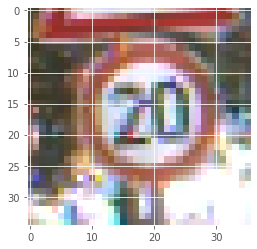

In [ ]:
print('img shape:', images_train[0].shape, ', label:', labels_train[0])
# print(images_test, '/n', labels_test)
plt.imshow(images_train[0])
plt.show()

In [ ]:
# resize images
images_train = [transform.resize(image, (28,28), mode="constant") for image in images_train]
images_test = [transform.resize(image, (28,28), mode="constant") for image in images_test]

# convert to numpy arrays for efficiency
images_train = np.asarray(images_train)
images_test = np.asarray(images_test)

# convert images to greyscale
# images_train = rgb2gray(images_train)
# images_test = rgb2gray(images_test)
# when doing this, cmap must be set to grayscale when plotting the images

img shape: (28, 28, 3) , label: 0


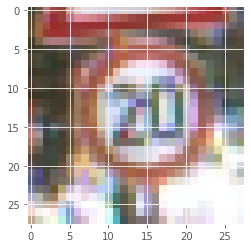

In [ ]:
print('img shape:', images_train[0].shape, ', label:', labels_train[0])
# print(images_test, '/n', labels_test)
plt.imshow(images_train[0])
plt.show()

In [ ]:
print ("Trainingset:")
print ("img ndim: %d" % (images_train.ndim))
print ("number of images %d" % (len(images_train)))

print ("number of labels: %d" % (len(labels_train)))
print ("unique labels: %d" % (len(set(labels_train))))

print ("image shape", images_train[0].shape)

print ("\n")

print ("Testset:")
print ("img ndim: %d" % (images_test.ndim))
print ("number of images %d" % (len(images_test)))

print ("number of labels: %d" % (len(labels_test)))
print ("unique labels: %d" % (len(set(labels_test))))

Trainingset:
img ndim: 4
number of images 1
number of labels: 1
unique labels: 1
image shape (28, 28, 3)


Testset:
img ndim: 4
number of images 210
number of labels: 210
unique labels: 1


**First Task: near duplicate**

In [ ]:
img1 = images_train[0]  # queryImage
for img2 in images_test[1:]:

  # Initiate ORB detector
  orb = cv.ORB_create()

  # find the keypoints and descriptors with ORB
  kp1, des1 = orb.detectAndCompute(img1,None)
  kp2, des2 = orb.detectAndCompute(img2,None)

  # FLANN parameters
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)   # or pass empty dictionary

  flann = cv.FlannBasedMatcher(index_params,search_params)

  matches = flann.knnMatch(des1,des2,k=2)

  # Need to draw only good matches, so create a mask
  matchesMask = [[0,0] for i in range(len(matches))]

  # ratio test as per Lowe's paper
  for i,(m,n) in enumerate(matches):
      if m.distance < 0.7*n.distance:
          matchesMask[i]=[1,0]

  draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)

  img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

  plt.imshow(img3,),plt.show()

error: ignored

**Second Task: Bag-of-Word model**

In [ ]:
# load data
categries = []
for i in range(43):
  categries.append(str(i))
# images_train, labels_train = load_data(train_data_directory, para = 'train', categries = categries)
images_test, labels_test = load_data(test_data_directory, para = 'test', categries = categries)

--- Loading 0 ---
There are 210 pictures
--- Loading 1 ---
There are 2220 pictures


KeyboardInterrupt: ignored